# 뇌졸증 예측

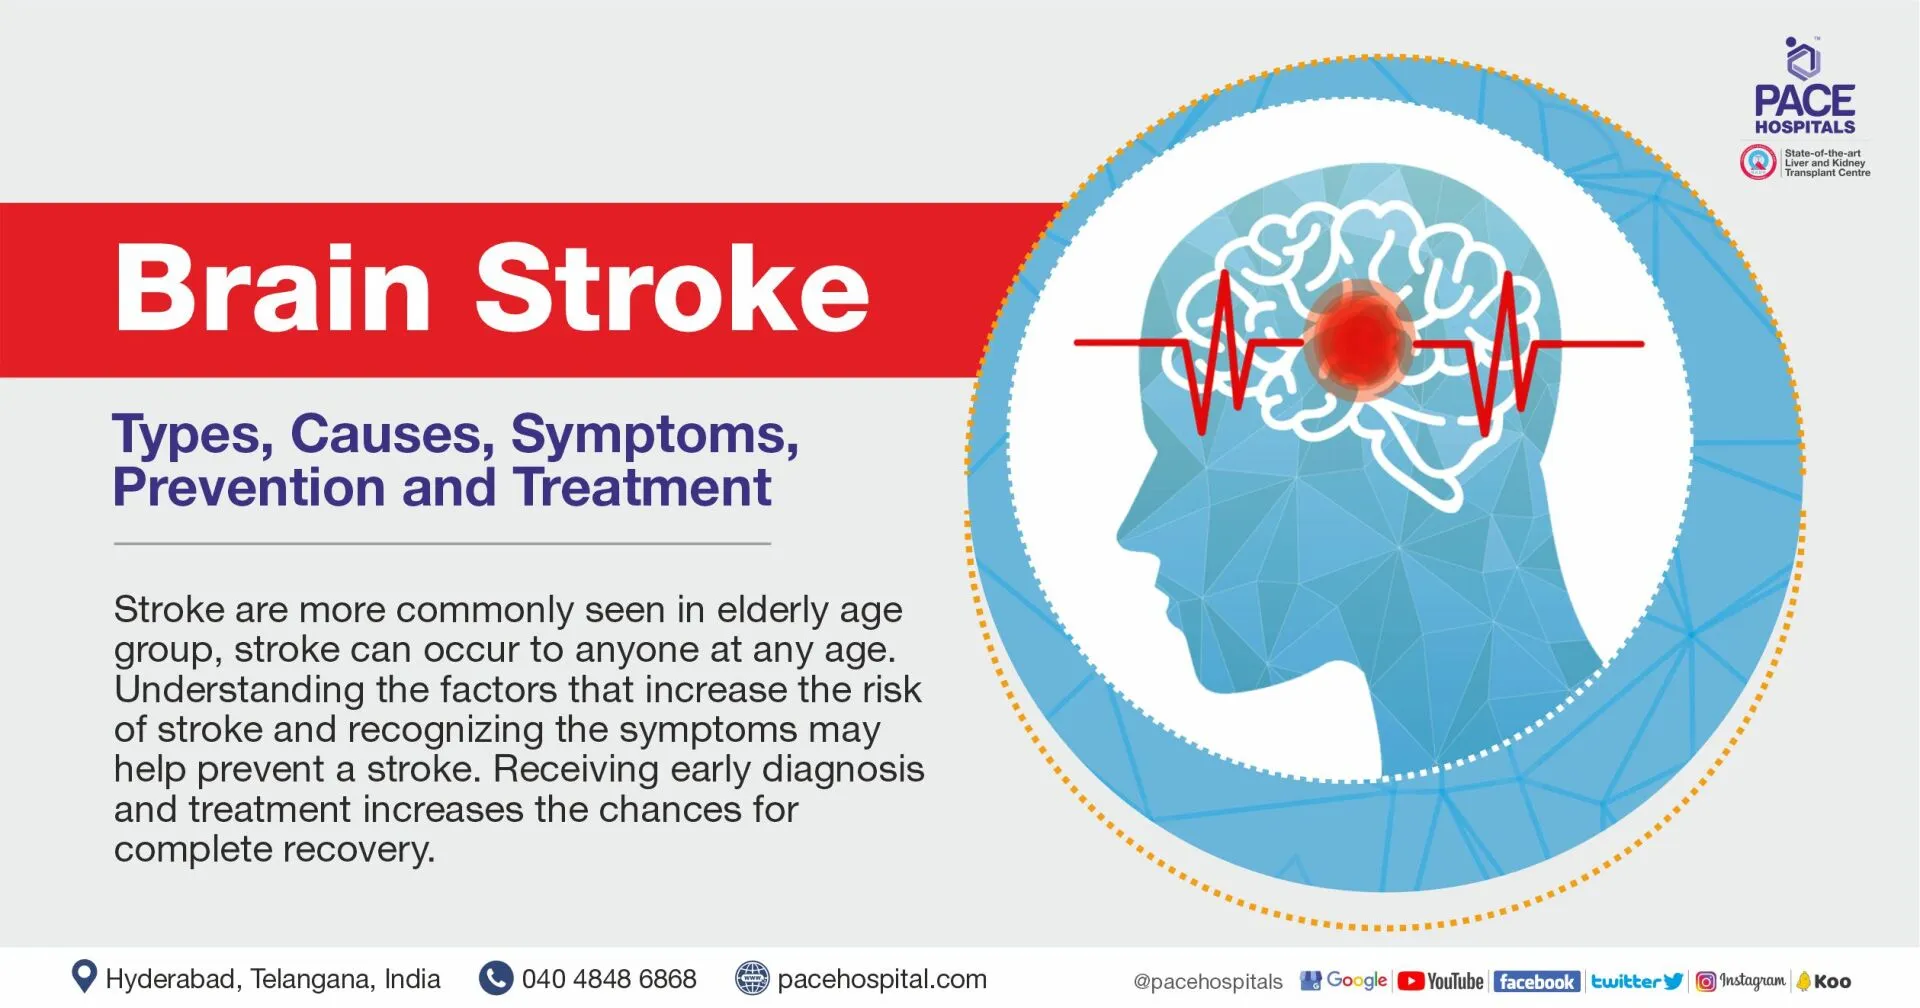

In [1]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

raw_data = pd.read_csv("full_data.csv")
raw_data.shape
raw_data.head()

(4981, 11)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## EDA : Exploratory Data Analysis 

In [3]:
raw_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
raw_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- null값 없음

In [5]:
raw_data['gender'].value_counts()
raw_data['ever_married'].value_counts()
raw_data['work_type'].value_counts()
raw_data['Residence_type'].value_counts()
raw_data['smoking_status'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

Yes    3280
No     1701
Name: ever_married, dtype: int64

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

- gender 는 고루 분포되어 있는 편
- ever_married 는 yes 가 상당히 많음
- work_type 은 Private 에 몰려있고 나머지는 고루 분포
- Residence_type 은 고루 분포
- smoking_status 에서 unkown으로 해석하기 어려운 데이터수가 많고 흡연경험을 formerly와 smokes로 흡연경험 무를 nerver smoked로 나눌 수 있을 것 같음

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.28,0.26,0.24,0.37,0.25
hypertension,0.28,1.00,0.11,0.17,0.16,0.13
heart_disease,0.26,0.11,1.00,0.17,0.06,0.13
avg_glucose_level,0.24,0.17,0.17,1.00,0.19,0.13
bmi,0.37,0.16,0.06,0.19,1.00,0.06
stroke,0.25,0.13,0.13,0.13,0.06,1.00


<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

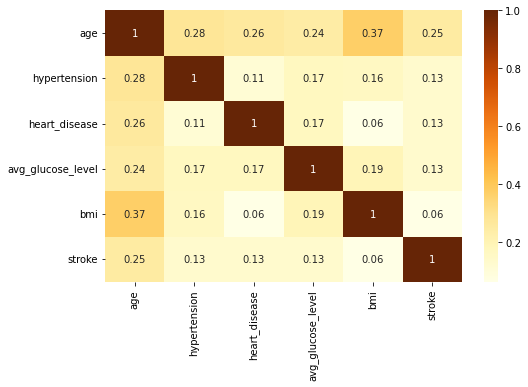

In [6]:
corr_mat = raw_data.corr().round(2)
corr_mat
plt.figure(figsize=(8,5))
sns.heatmap(corr_mat,annot=True,cmap='YlOrBr')

In [7]:
corr_mat.iloc[[-1]].drop('stroke',axis=1)

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,0.25,0.13,0.13,0.13,0.06


- stroke 여부와 다른변수들간 상관관계가 상당히 낮아보임

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='stroke', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='stroke', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='stroke', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='stroke', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='stroke', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='stroke', ylabel='count'>

<AxesSubplot:>

<AxesSubplot:xlabel='stroke', ylabel='count'>

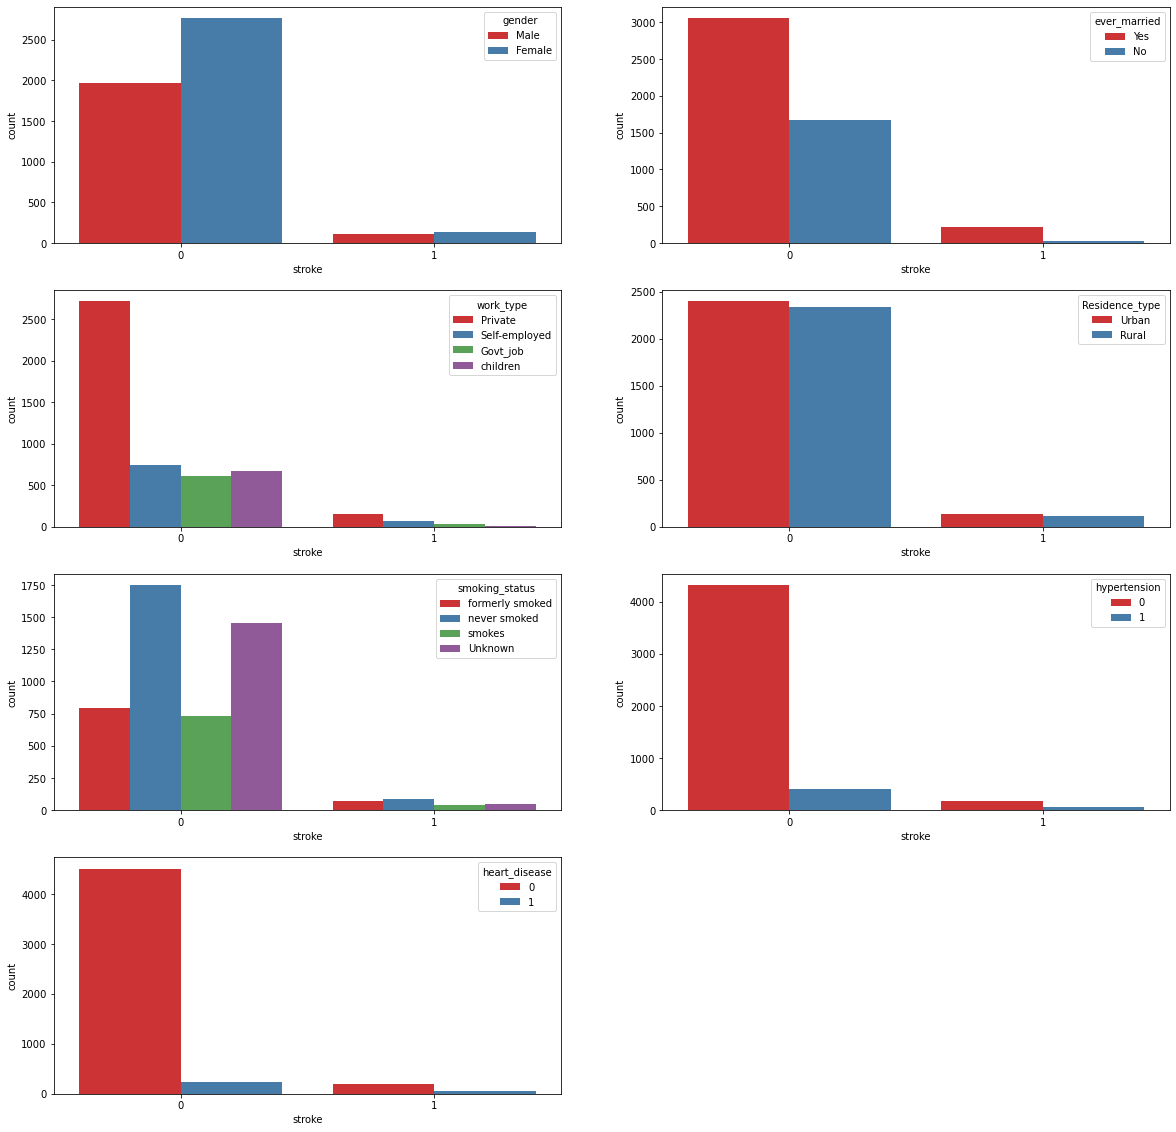

In [8]:
plt.figure(figsize=(20,20))
plt.subplot(421)
sns.countplot(x='stroke', hue='gender', palette='Set1',data=raw_data)
plt.subplot(422)
sns.countplot(x='stroke', hue='ever_married', palette='Set1',data=raw_data)
plt.subplot(423)
sns.countplot(x='stroke', hue='work_type', palette='Set1',data=raw_data)
plt.subplot(424)
sns.countplot(x='stroke', hue='Residence_type', palette='Set1',data=raw_data)
plt.subplot(425)
sns.countplot(x='stroke', hue='smoking_status', palette='Set1',data=raw_data)
plt.subplot(426)
sns.countplot(x='stroke', hue='hypertension', palette='Set1',data=raw_data)
plt.subplot(427)
sns.countplot(x='stroke', hue='heart_disease', palette='Set1',data=raw_data)

- stroke 0 <br>
    : Female 일 경우가 더 많다 <br>
    : ever_married 가 Yes 인 경우가 더 많다<br>
    : work_type 이 Private 인 경우가 상당히 많다<br>
    : Residence_type 이 urban인 경우와 Rural 인경우 비슷하게 많다<br>
    : smoking_status는 nerver_smoked와 Unkown인 경우가 가장 많다<br>
    : hypertension은 0 인 경우가 큰 차이로 많다<br>
    : heart_disease 또한 0인 경우가 큰 차이로 많다<br><br>

- stroke 1<br>
    : Female / Male 경우 모두 stroke 0 인 경우보다 낮다<br>
    : ever_married 가 Yes 인 경우가 No 인 경우보다 상대적으로 높다.<br>
    : work_type 이 Private 인 경우가 상대적으로 많다<br>
    : Residence_type 이 urban인 경우와 Rural 인경우 모두 stroke 0인 경우보다 적다<br>
    : smoking_status는 stroke 0인 경우보다 적다<br>
    : hypertension은 stroke 0인 경우보다 적고 hypertension 의 0 과 1사이는 상대적으로 차이가 크지않다<br>
    : heart_disease 또한 stroke 0인 경우보다 적고 hypertension 의 0 과 1사이는 상대적으로 차이가 크지않다<br>

### 성별과 다른 변수를 조합해  stroke 발생여부를 시각화를 통해 알아본다

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='gender', ylabel='stroke'>

<AxesSubplot:>

<AxesSubplot:xlabel='gender', ylabel='stroke'>

<AxesSubplot:>

<AxesSubplot:xlabel='gender', ylabel='stroke'>

<AxesSubplot:>

<AxesSubplot:xlabel='gender', ylabel='stroke'>

<AxesSubplot:>

<AxesSubplot:xlabel='gender', ylabel='stroke'>

<AxesSubplot:>

<AxesSubplot:xlabel='gender', ylabel='stroke'>

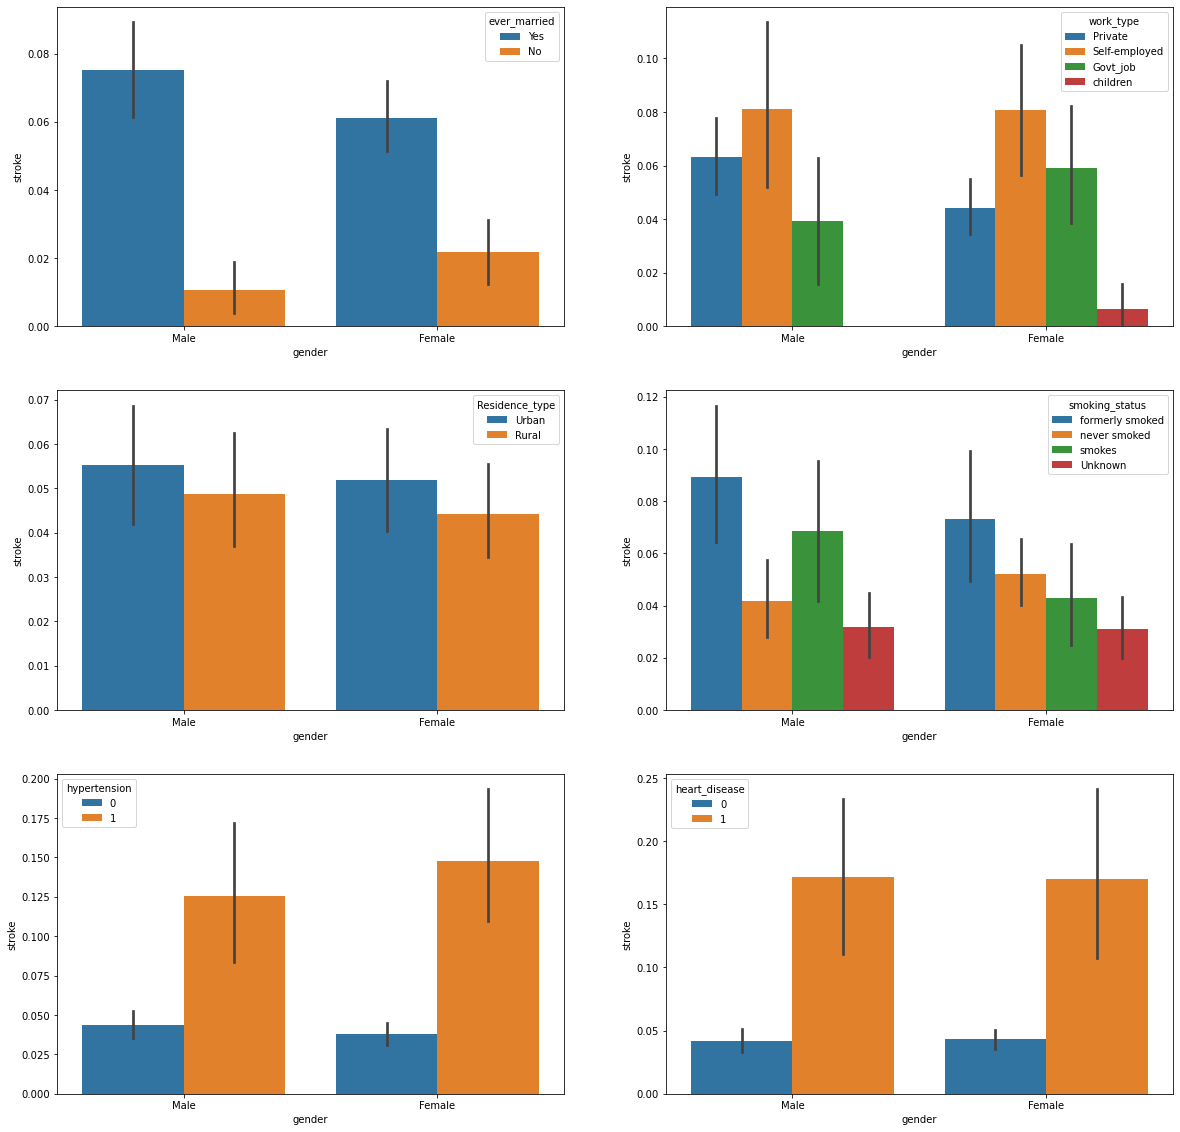

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(321)
sns.barplot(x='gender',y='stroke',hue='ever_married',data=raw_data)   # 성별/결혼경험
plt.subplot(322)
sns.barplot(x='gender',y='stroke',hue='work_type',data=raw_data)      # 성별/근무형태
plt.subplot(323)
sns.barplot(x='gender',y='stroke',hue='Residence_type',data=raw_data) # 성별/거주형태
plt.subplot(324)
sns.barplot(x='gender',y='stroke',hue='smoking_status',data=raw_data) # 성별/흡연상태
plt.subplot(325)
sns.barplot(x='gender',y='stroke',hue='hypertension',data=raw_data)   # 성별/고혈압
plt.subplot(326)
sns.barplot(x='gender',y='stroke',hue='heart_disease',data=raw_data)  # 성별/심장질환

#### 연속형 변수 확인 (나이,BMI,평균포도당수준)

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

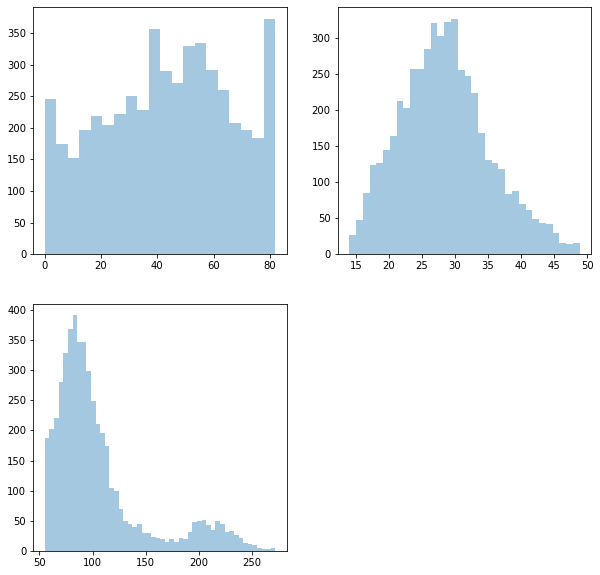

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.distplot(x=raw_data.age, kde=False)
plt.subplot(222)
sns.distplot(x=raw_data.bmi, kde=False)
plt.subplot(223)
sns.distplot(x=raw_data.avg_glucose_level, kde=False)

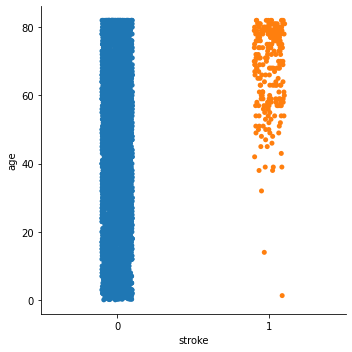

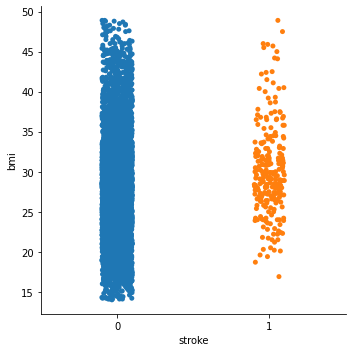

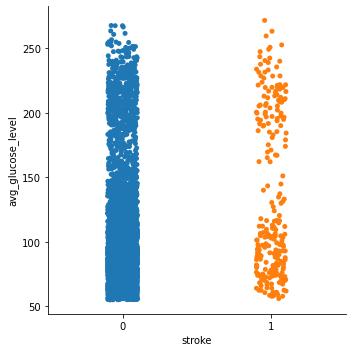

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
sns.catplot(x='stroke',y='age',data=raw_data,ax=ax1)
ax2 = fig.add_subplot(222)
sns.catplot(x='stroke',y='bmi',data=raw_data,ax=ax2)
ax3 = fig.add_subplot(223)
sns.catplot(x='stroke',y='avg_glucose_level',data=raw_data,ax=ax3)
plt.close(0)
plt.close(1)
plt.tight_layout()

- age 가 높아질수록 stroke 발생확률이 높아진다.
- BMI 가 특정 구간에서 stroke 발생확률이 높아진다.
- avg_glucose_level이 너무 낮거나 너무 높은 구간에서 stroke 발생확률이 높아진다.

## Modeling

In [12]:
raw_data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

Analyzing the data we can see that we have a lot more data with Non Stroke, so the models will learning more about this data than when the person doesn't has Stroke and can't learn about when this person will has Brain Stroke, then we need to balance the classes and see what we can do with this data.

Here we use the function OverSampling to balancing the classes, we are doing a Oversampling and both target variable will have the same number of samples.

In [13]:
raw_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [50]:
X = raw_data.drop('stroke',axis=1).values
y = raw_data['stroke'].values

pip install imbalanced-learn

In [51]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X , y = ros.fit_resample(X,y)

<AxesSubplot:ylabel='count'>

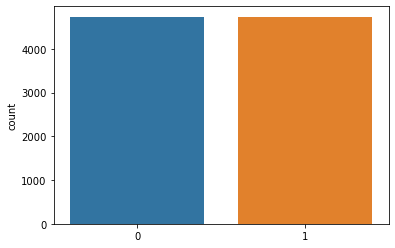

In [52]:
sns.countplot(x=y)

#### Label Encoder "범주형변수를 연속형변수로 변환"

In [53]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


- 범주형변수 이름과 열 위치번호 추출

In [ ]:
category_feature = [ col for col in raw_data.columns if raw_data[col].dtypes == "object"]
category_feature

In [54]:
index_num = [raw_data.columns.get_loc(f) for f in category_feature]
index_num

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

[0, 4, 5, 6, 9]

In [55]:
X

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ['Female', 49.0, 0, ..., 171.23, 34.4, 'smokes'],
       ...,
       ['Male', 57.0, 1, ..., 78.92, 27.7, 'formerly smoked'],
       ['Male', 57.0, 1, ..., 212.08, 44.2, 'smokes'],
       ['Male', 78.0, 1, ..., 75.32, 29.1, 'formerly smoked']],
      dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder

X[:,0] = LabelEncoder().fit_transform(X[:,0])
X[:,4] = LabelEncoder().fit_transform(X[:,4])
X[:,5] = LabelEncoder().fit_transform(X[:,5])
X[:,6] = LabelEncoder().fit_transform(X[:,6])
X[:,9] = LabelEncoder().fit_transform(X[:,9])


In [62]:
print(X)

[[1 67.0 0 ... 228.69 36.6 1]
 [1 80.0 0 ... 105.92 32.5 2]
 [0 49.0 0 ... 171.23 34.4 3]
 ...
 [1 57.0 1 ... 78.92 27.7 1]
 [1 57.0 1 ... 212.08 44.2 3]
 [1 78.0 1 ... 75.32 29.1 1]]


##### StandardScaler

In [63]:
from sklearn.preprocessing import StandardScaler

X_standard = StandardScaler().fit_transform(X)

In [64]:
X_standard[0]

array([ 1.15690913,  0.5406863 , -0.47439962,  2.69846526,  0.56002458,
       -0.28227877,  0.92898821,  1.95236302,  1.13607631, -0.4402335 ])

##### MinMaxScaler

In [65]:
from sklearn.preprocessing import MinMaxScaler

X_normalization = MinMaxScaler().fit(X).transform(X)

In [66]:
X_normalization[0]

array([1.        , 0.81689453, 0.        , 1.        , 1.        ,
       0.33333333, 1.        , 0.80126489, 0.64756447, 0.33333333])

- 독립변수와 종속변수 분리

### 알고리즘 별 예측 모델링 수행

- StandardScaler, MinMaxScaler 이용 예측

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [68]:
X_train.shape,y_train.shape
X_test.shape,y_test.shape

((6626, 10), (6626,))

((2840, 10), (2840,))

### DecisionTree

DecisionTreeClassifier 정확도: 0.7697


<Figure size 1800x1440 with 0 Axes>

[Text(0.5, 0.875, 'age <= 47.5\ngini = 0.5\nsamples = 6626\nvalue = [3305, 3321]\nclass = Yes BrainStroke'),
 Text(0.25, 0.625, 'age <= 37.5\ngini = 0.143\nsamples = 1994\nvalue = [1840, 154]\nclass = No BrainStroke'),
 Text(0.125, 0.375, 'avg_glucose_level <= 57.97\ngini = 0.037\nsamples = 1378\nvalue = [1352, 26]\nclass = No BrainStroke'),
 Text(0.0625, 0.125, 'gini = 0.357\nsamples = 43\nvalue = [33, 10]\nclass = No BrainStroke'),
 Text(0.1875, 0.125, 'gini = 0.024\nsamples = 1335\nvalue = [1319, 16]\nclass = No BrainStroke'),
 Text(0.375, 0.375, 'work_type <= 0.5\ngini = 0.329\nsamples = 616\nvalue = [488, 128]\nclass = No BrainStroke'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 94\nvalue = [94, 0]\nclass = No BrainStroke'),
 Text(0.4375, 0.125, 'gini = 0.37\nsamples = 522\nvalue = [394, 128]\nclass = No BrainStroke'),
 Text(0.75, 0.625, 'age <= 67.5\ngini = 0.432\nsamples = 4632\nvalue = [1465, 3167]\nclass = Yes BrainStroke'),
 Text(0.625, 0.375, 'avg_glucose_level <= 110.465\n

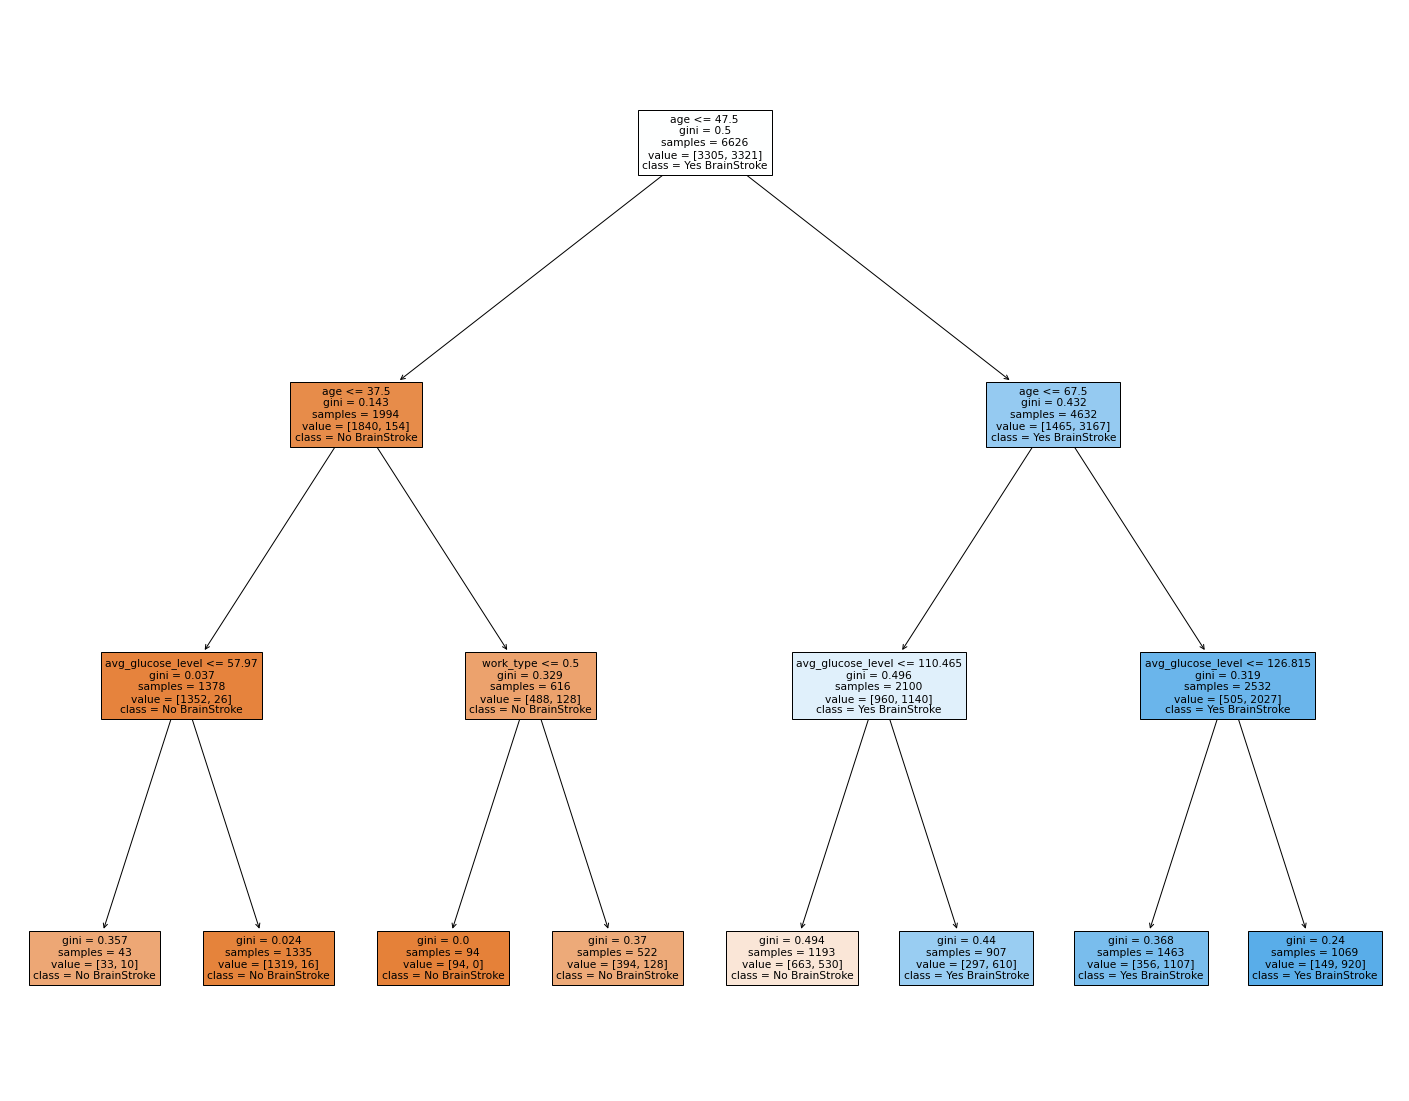

In [81]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(max_depth=3, random_state=0).fit(X_train, y_train)
dt_pred = dt.predict(X_test)

plt.figure(figsize=(25,20))
plot_tree(dt,feature_names=raw_data.columns[:-1],class_names= ['No BrainStroke','Yes BrainStroke'],filled=True)

In [86]:
dt_scores= classification_report(y_test,dt_pred)
print(dt_scores)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1428
           1       0.77      0.77      0.77      1412

    accuracy                           0.77      2840
   macro avg       0.77      0.77      0.77      2840
weighted avg       0.77      0.77      0.77      2840



### RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
# 100개 트리 생성
rf = RandomForestClassifier(n_estimators= 100 , max_depth=3,random_state=0).fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_scores= classification_report(y_test,rf_pred)
print(rf_scores)

              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1428
           1       0.73      0.89      0.80      1412

    accuracy                           0.78      2840
   macro avg       0.79      0.78      0.77      2840
weighted avg       0.79      0.78      0.77      2840



### KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(p=2)
k_list = list(range(1,31))
k_values = dict(n_neighbors = k_list)
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, k_values, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [93]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.9648364495290135)

In [94]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2).fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_scores= classification_report(y_test,knn_pred)
print(knn_scores)

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1428
           1       0.94      1.00      0.97      1412

    accuracy                           0.97      2840
   macro avg       0.97      0.97      0.97      2840
weighted avg       0.97      0.97      0.97      2840



### LogisticRegression

In [96]:
from sklearn.linear_model import LogisticRegression

logistic  =  LogisticRegression(random_state = 1).fit(X_train,y_train)
lo_pred = logistic.predict(X_test)
lo_scores = classification_report(y_test, lo_pred)
print(lo_scores)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1428
           1       0.75      0.79      0.77      1412

    accuracy                           0.77      2840
   macro avg       0.77      0.77      0.77      2840
weighted avg       0.77      0.77      0.77      2840



### SVM

In [98]:
from sklearn.svm import SVC


svm = SVC(kernel = 'linear',random_state =1, C = 1.0).fit(X_train,y_train)
svm_pred = svm.predict(X_test)
svm_scores = classification_report(y_test,svm_pred)
print(svm_scores)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1428
           1       0.74      0.82      0.78      1412

    accuracy                           0.77      2840
   macro avg       0.77      0.77      0.77      2840
weighted avg       0.77      0.77      0.77      2840



In [99]:
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('KNeighborsClassifier정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lo_pred)))
print('SVC 정확도: {0:.4f}'.format(accuracy_score(y_test, svm_pred)))

DecisionTreeClassifier 정확도: 0.7697
RandomForestClassifier 정확도: 0.7764
KNeighborsClassifier정확도: 0.9665
LogisticRegression 정확도: 0.7665
SVC 정확도: 0.7669
